# Advanced finite difference

This notebook assumes that you have completed the *finite difference operations* notebook.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Spatially variable diffusivity

For most purposes we want $\kappa$ to be spatially variable.
The heat equation can be expressed as,

$$\frac{\partial}{\partial x} \left( \kappa \frac{\partial T}{\partial x} \right) + \frac{\partial}{\partial y} \left( \kappa \frac{\partial T}{\partial y} \right) = -H $$

The corresponding finite difference approximations in the $x$ and $y$ coordinates are,

$$ \frac{\partial}{\partial x} \left( \kappa \frac{\partial T}{\partial x} \right) = \frac{1}{\Delta x} \left( \frac{ \kappa_{i+1/2,j} (T_{i+1,j}-T_{i,j}) }{\Delta x} - \frac{ \kappa_{i-1/2,j} (T_{i,j}-T_{i-1,j}) }{\Delta x} \right) $$

$$ \frac{\partial}{\partial y} \left( \kappa \frac{\partial T}{\partial y} \right)  = \frac{1}{\Delta y} \left( \frac{ \kappa_{i,j+1/2} (T_{i,j+1}-T_{i,j}) }{\Delta y} - \frac{ \kappa_{i,j-1/2} (T_{i,j}-T_{i,j-1}) }{\Delta y} \right) $$

where \\( \kappa_{i+1/2,j} \\) can be averaged by,

$$ \kappa_{i+1/2,j} = \frac{\kappa_{i+1,j} + \kappa_{i,j}}{2} $$

---

> **EXERCISE 1** Construct your own matrices using the finite difference approximation for non-constant diffusivity.

---

## 2. Modelling complex geometries

Now for the fun part.
In this section we take a 2D geological cross section (from some random part of the world) and model the temperature variation across different rock types.
To do this requires assignment of thermal properties, \\( \kappa, H \\), to each layer in the cross section.

Before you attempt this, here is a checklist of what you should have accomplished:

1. 2D steady-state heat solver for non-constant \\( \kappa \\).
2. Neumann and Dirichlet boundary conditions.
3. Use of sparse matrices (optional, but recommended).

Our model domain is 800 x 260 nodes and contains integers from 1 to 28 that correspond to a unique rock layer.
Your task will be to create a conductivity and heat production field, that vary with lithology, and pass them to your solver.

---

> **EXERCISE 2** Assign thermal properties to the voxel data and solve steady-state diffusion

---

Create 3 plots: temperature, conductivity, and heat production.
(You might want to give them distinct colourmaps to help distinguish them!)

In [7]:
voxel = np.load('voxel_data.npz')['data']
voxel.shape

(260, 800)

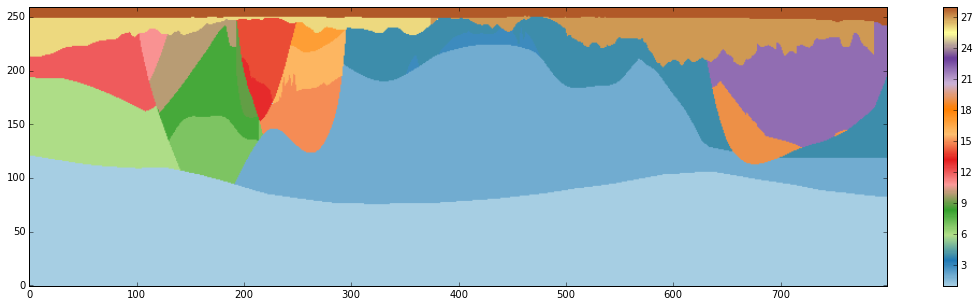

In [8]:
fig = plt.figure(1, figsize=(20, 5))

ax1 = fig.add_subplot(111)
im1 = ax1.imshow(voxel, origin='lower', cmap='Paired', vmin=1, vmax=28)
fig.colorbar(im1, ax=ax1)

plt.show()

What we have is a 2D voxel model that was exported from GoCAD.
Each colour represents a unique lithology.
Pretty eh?

Now we will assign these thermal properties and solve temperature across them.